<a href="https://colab.research.google.com/github/Joaovvilar/tcc/blob/main/TCC_JVV_Coffee_Hedging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Define o ticker para o café
ticker = "KC=F"

# Obtém os dados históricos do café
data = yf.download(ticker, period="10y")

# Calcula o mês e o ano com base na coluna 'Date'
data['Year'] = data.index.year
data['Month'] = data.index.month

# Agrupa os dados por ano e mês e calcula a média, mediana e desvio padrão
estatisticas_por_mes = data.groupby(['Year', 'Month']).agg({'Close': ['mean', 'median', 'std'], 'Volume': ['mean', 'median', 'std']})

# Renomeia as colunas
colunas = {
    'mean': 'Média',
    'median': 'Mediana',
    'std': 'Desvio Padrão'
}
estatisticas_por_mes = estatisticas_por_mes.rename(columns=colunas)

# Adiciona a coluna de correlação entre preço médio e volume médio
correlacao = data.groupby(['Year', 'Month']).apply(lambda x: np.corrcoef(x['Close'], x['Volume'])[0, 1])
estatisticas_por_mes['Correlação'] = correlacao

def exibir_tabela(estatisticas):
    pd.set_option('display.float_format', '{:.2f}'.format)
    display(HTML(estatisticas.to_html()))



[*********************100%***********************]  1 of 1 completed


In [72]:
# Função para calcular estatísticas por ano
def calcular_estatisticas_por_ano(data):
    estatisticas_por_ano = data.resample('Y').apply(lambda x: pd.Series({
        'Média: Preço': x['Close'].mean(),
        'Média: Volume': x['Volume'].mean(),
        'Mediana: Preço': x['Close'].median(),
        'Mediana: Volume': x['Volume'].median(),
        'Desvio Padrão: Preço': x['Close'].std(),
        'Desvio Padrão: Volume': x['Volume'].std()
    }))
    return estatisticas_por_ano

# Função para exibir a tabela com as informações calculadas em formato HTML
def exibir_tabela(estatisticas):
    pd.set_option('display.float_format', '{:.2f}'.format)
    html_table = estatisticas.to_html()
    html_table = html_table.replace('<table', '<table style="border-collapse: separate; border-spacing: 10px;"')
    display(HTML(html_table))

# Função para exibir a tabela com as estatísticas por ano
def exibir_tabela_por_ano(data):
    estatisticas_por_ano = calcular_estatisticas_por_ano(data)
    exibir_tabela(estatisticas_por_ano)

In [ ]:
 exibir_tabela(estatisticas_por_mes)

In [ ]:
# Exibe a tabela com as estatísticas por ano em formato HTML
exibir_tabela_por_ano(data)

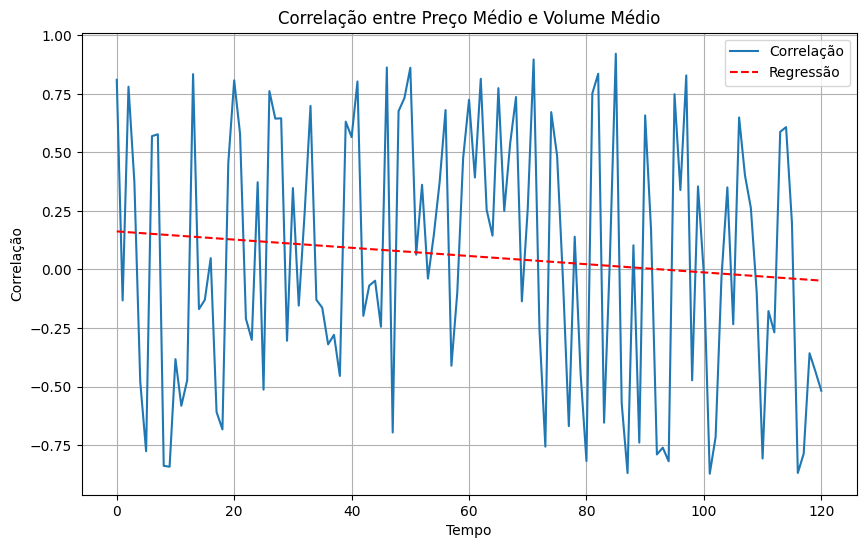

In [75]:
# Dados
x = np.arange(len(estatisticas_por_mes.index))
y = estatisticas_por_mes['Correlação']

# Regressão linear
coefficients = np.polyfit(x, y, 1)
poly = np.poly1d(coefficients)
y_fit = poly(x)

# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Correlação')
plt.plot(x, y_fit, 'r--', label='Regressão')
plt.xlabel('Tempo')
plt.ylabel('Correlação')
plt.title('Correlação entre Preço Médio e Volume Médio')
plt.legend()
plt.grid(True)
plt.show()